Meu trabalho será criar um classificador capaz de identificar pessoas diabéticas. Este documento contém o código usado para explorar os dados e para treinar os algoritmos de machine learning, além de textos elucidativos. O dataset utilizado é proveniente do hospital de frankfurt, Alemanha.

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/datasets/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


A insulina é um hormônio produzido pelo pâncrias, necessário para reduzir a quantidade de glicose no sangue. Minha primeira ideia foi observar a relação entre os níveis de glicose e insulina nos pacientes

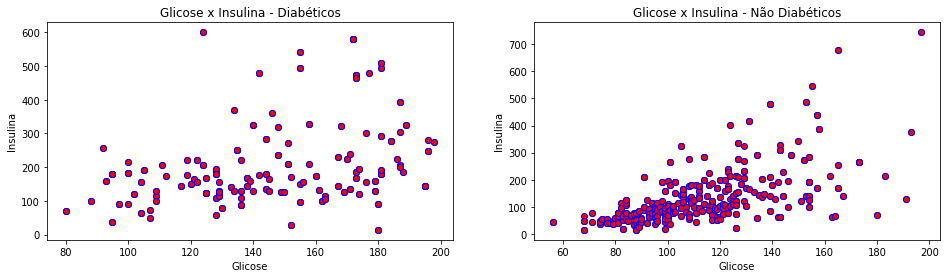

In [ ]:
labels = ['Glucose', 'Insulin', 'Outcome']
insulin_glucose = df.copy()[labels]
insulin_glucose.sort_values(by=['Glucose'], inplace=True)
insulin_glucose.drop(insulin_glucose[(insulin_glucose['Insulin'] == 0) | (insulin_glucose['Glucose'] == 0)].index, inplace=True)
outcome1 = insulin_glucose[insulin_glucose['Outcome'] == 1]
outcome0 = insulin_glucose[insulin_glucose['Outcome'] == 0]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
ax1.scatter(x=outcome1['Glucose'], y=outcome1['Insulin'], marker='o', c='r', edgecolor='b')
ax2.scatter(x=outcome0['Glucose'], y=outcome0['Insulin'], marker='o', c='r', edgecolor='b')

ax1.set_title('Glicose x Insulina - Diabéticos')
ax1.set_xlabel('Glicose')
ax1.set_ylabel('Insulina')
ax2.set_title('Glicose x Insulina - Não Diabéticos')
ax2.set_xlabel('Glicose')
ax2.set_ylabel('Insulina')

plt.show()

A maior parte dos não diabéticos se concentram próximos ao canto inferior esquerdo do segundo gráfico, o que era esperado de pessoas dessa categoria já que a diabetes ocorre devido ao acumulo de glicose no sangue e quanto menos glicose há no corpo do paciente, menos insulina é produzida por ele. Os diabéticos aparecem de forma mais bem distribuída ao longo do gráfico, havendo uma quantidade maior de pacientes com níveis de glicose superior a 160.

Os próximos gráficos foram gerados para investigar a relação entre o número de gestações e a ocorrência de diabetes. Cada fatia representa o número de gestações.

In [ ]:
df['Pregnancies'].unique()

array([ 2,  0,  1,  4,  8,  3,  6,  5,  7, 10, 12,  9, 11, 13, 15, 17, 14])

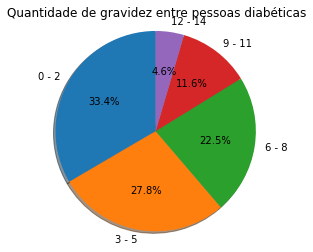

In [ ]:
labels = ['Pregnancies', 'Outcome']
diabetes_pregnancies_df = df.copy()[labels]
dpregnancies1 = len(diabetes_pregnancies_df[(diabetes_pregnancies_df['Pregnancies'] <= 2) & (diabetes_pregnancies_df['Outcome'] == 1)].index)
dpregnancies2 = len(diabetes_pregnancies_df[(diabetes_pregnancies_df['Pregnancies'] > 2) & (diabetes_pregnancies_df['Pregnancies'] <= 5) & (diabetes_pregnancies_df['Outcome'] == 1)].index)
dpregnancies3 = len(diabetes_pregnancies_df[(diabetes_pregnancies_df['Pregnancies'] > 5) & (diabetes_pregnancies_df['Pregnancies'] <= 8) & (diabetes_pregnancies_df['Outcome'] == 1)].index)
dpregnancies4 = len(diabetes_pregnancies_df[(diabetes_pregnancies_df['Pregnancies'] > 8) & (diabetes_pregnancies_df['Pregnancies'] <= 11) & (diabetes_pregnancies_df['Outcome'] == 1)].index)
dpregnancies5 = len(diabetes_pregnancies_df[(diabetes_pregnancies_df['Pregnancies'] > 11) & (diabetes_pregnancies_df['Pregnancies'] <= 14) & (diabetes_pregnancies_df['Outcome'] == 1)].index)

pregnancies_df = df.copy()[labels]
pregnancies1 = len(pregnancies_df[(pregnancies_df['Pregnancies'] <= 2) & (pregnancies_df['Outcome'] == 0)].index)
pregnancies2 = len(pregnancies_df[(pregnancies_df['Pregnancies'] > 2) & (pregnancies_df['Pregnancies'] <= 5) & (pregnancies_df['Outcome'] == 0)].index)
pregnancies3 = len(pregnancies_df[(pregnancies_df['Pregnancies'] > 5) & (pregnancies_df['Pregnancies'] <= 8) & (pregnancies_df['Outcome'] == 0)].index)
pregnancies4 = len(pregnancies_df[(pregnancies_df['Pregnancies'] > 8) & (pregnancies_df['Pregnancies'] <= 11) & (pregnancies_df['Outcome'] == 0)].index)
pregnancies5 = len(pregnancies_df[(pregnancies_df['Pregnancies'] > 11) & (pregnancies_df['Pregnancies'] <= 14) & (pregnancies_df['Outcome'] == 0)].index)

sizes_d = [dpregnancies1, dpregnancies2, dpregnancies3, dpregnancies4, dpregnancies5]
sizes = [pregnancies1, pregnancies2, pregnancies3, pregnancies4, pregnancies5]

fig1, ax1 = plt.subplots(figsize=(4,4))
ax1.set_title('Quantidade de gravidez entre pessoas diabéticas')
ax1.pie(sizes_d, labels=['0 - 2', '3 - 5', '6 - 8', '9 - 11', '12 - 14'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

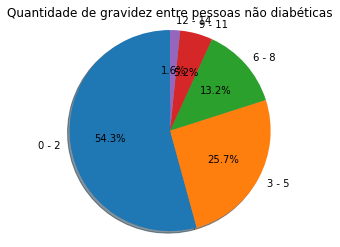

In [ ]:
fig1, ax1 = plt.subplots(figsize=(4,4))
ax1.set_title('Quantidade de gravidez entre pessoas não diabéticas')
ax1.pie(sizes, labels=['0 - 2', '3 - 5', '6 - 8', '9 - 11', '12 - 14'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

Mais da metade dos não diabéticos tiveram menos de três filhos enquanto que entre os diabéticos essa categoria representa aproximadamente um terço dos pacientes. O número de pacientes que tiveram entre seis e onze filhos também é maior entre diabéticos, o que me leva a crer que o número de gestações tem grande influência na condição do paciente quanto a diabetes.

O gráfico abaixo foi gerado para comparar a relação entre os índices de massa corparal e idades dos pacientes diabéticos com os não diabéticos.

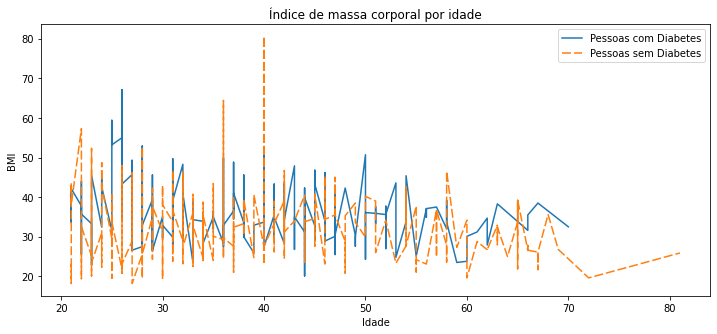

In [ ]:
labels = ['Age', 'BMI', 'Outcome']
age_bmi = df.copy()[labels]
age_bmi.drop(age_bmi[age_bmi['BMI'] == 0].index, inplace=True)
age_bmi.sort_values(by=['Age'], inplace=True)

x1 = age_bmi[age_bmi['Outcome'] == 1]['Age']
y1 = age_bmi[age_bmi['Outcome'] == 1]['BMI']
x2 = age_bmi[age_bmi['Outcome'] == 0]['Age']
y2 = age_bmi[age_bmi['Outcome'] == 0]['BMI']

fig, ax = plt.subplots(figsize=(12,5))
ax.set_title('Índice de massa corporal por idade')
ax.set_ylabel('BMI')
ax.set_xlabel('Idade')

line1, = ax.plot(x1, y1, label='Pessoas com Diabetes')
line2, = ax.plot(x2, y2, dashes=[6, 2], label='Pessoas sem Diabetes')

ax.legend()
plt.show()

A curva azul permanece acima da curva laranja durante grande parte do gráfico, principalmente entre pacientes de 20 a 40 anos e entre pacientes a partir de 60 anos. Isso indica que pessoas com maior massa corporal tendem a desenvolver diabetes com mais frequência.

A "diabetes pedigree function" é uma função que calcula a probabilidade de um paciente desenvolver diabetes a partir de seu histórico familiar. O próximo gráfico exibe a frequência de pacientes por valores dessa função.

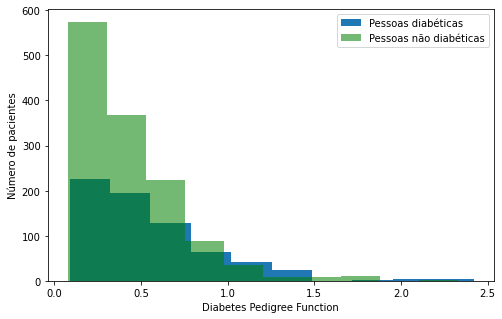

In [ ]:
labels = ['DiabetesPedigreeFunction', 'Outcome']
dpf_outcome = df.copy()[labels]

fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
ax1.hist(dpf_outcome[dpf_outcome['Outcome'] == 1]['DiabetesPedigreeFunction'], label='Pessoas diabéticas')
ax1.hist(dpf_outcome[dpf_outcome['Outcome'] == 0]['DiabetesPedigreeFunction'], alpha=0.55, color='green', label='Pessoas não diabéticas')
ax1.set_ylabel('Número de pacientes')
ax1.set_xlabel('Diabetes Pedigree Function')
ax1.legend()
plt.show()

Como pacientes não diabéticos aparecem menos na região mais à esquerda do gráfico e pacientes diabéticos aparecem de forma mais destacada à direita, apesar de em pouca quantidade, fica evidente que os valores dessa função possuem influência na condição do indivíduo.